# Python-igraph编程实践基础教程：igraph官方手册使用解读

## igraph编程实践基础教程第07课：幂律分布与BA无标度网络

In [1]:
# !/usr/bin/python3
# -*- coding: utf-8 -*-
# Author ： 单哥的科研日常（公众号、B站）
# 示例程序所用库的版本：igraph==0.9.11

In [2]:
import igraph as ig
print(ig.__version__)

0.10.4


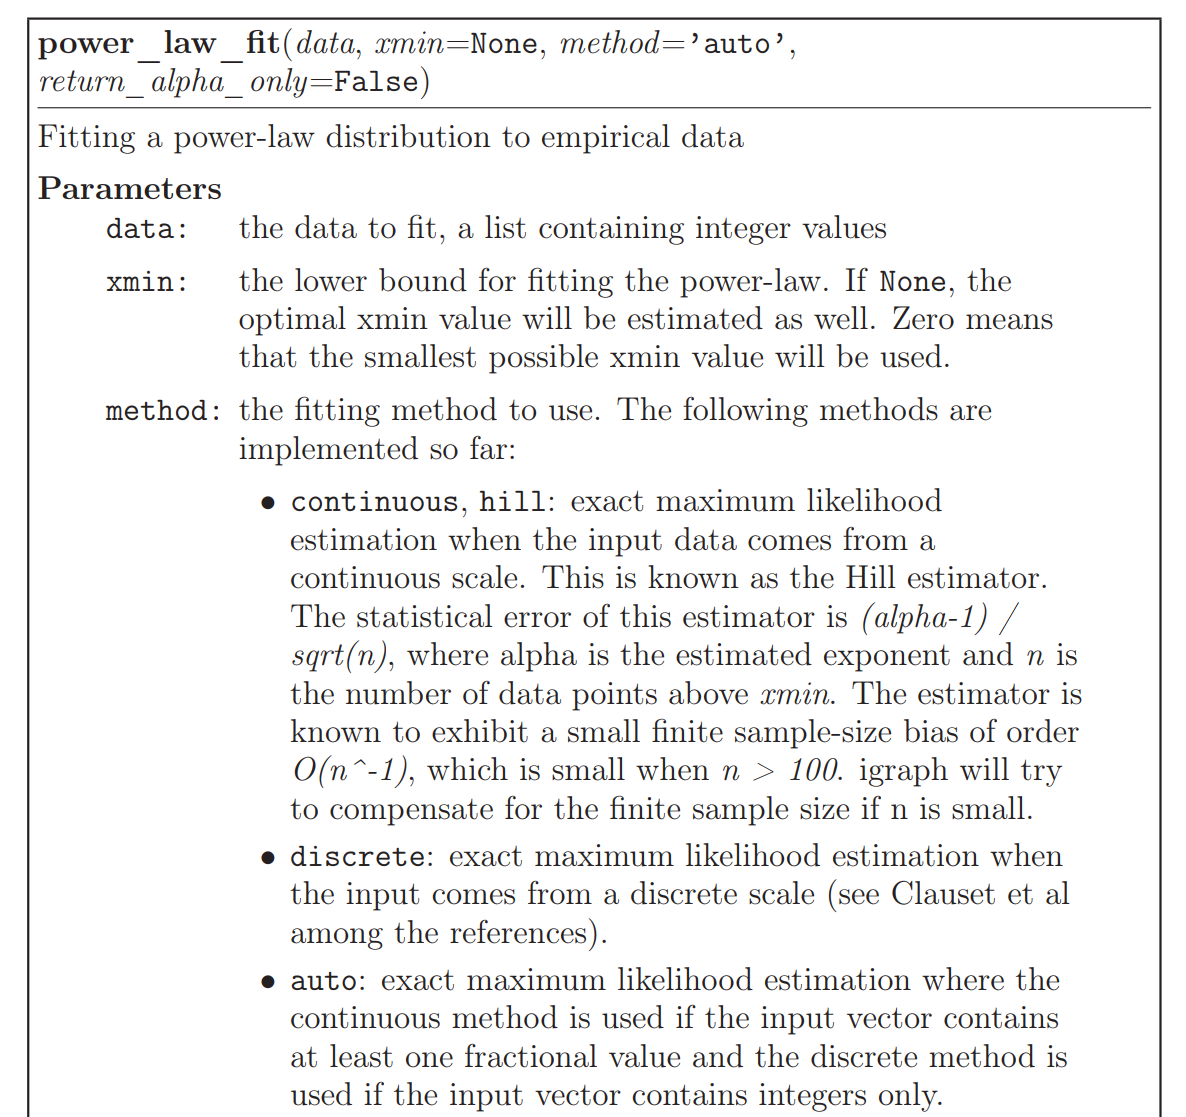

In [3]:
from IPython.display import Image
Image(filename = './attached files/power_law_fit.png', width=600, height=400)

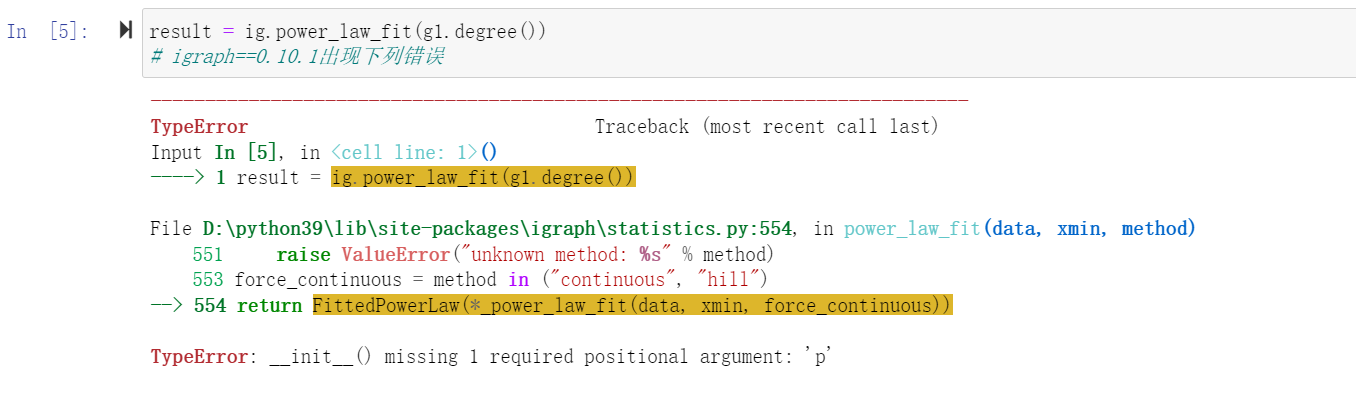

In [4]:
Image(filename = './attached files/problem_power_law_fit.png', width=600, height=400)

In [5]:
g1 = ig.Graph.Barabasi(n=100000,m=1)
g2 = ig.Graph.Barabasi(n=100000,m=3)
g3 = ig.Graph.Barabasi(n=100000,m=5)

In [6]:
# 在igraph==0.10.4上正常运行
result1 = ig.power_law_fit(g1.degree(), method='continuous')
result2 = ig.power_law_fit(g2.degree(), method='continuous')
result3 = ig.power_law_fit(g3.degree(), method='continuous')

In [7]:
result1

FittedPowerLaw(continuous=True, alpha=4.073947764896535, xmin=42.0, L=-110.32060304660996, D=0.0577458494568181, p=0.9572)

In [8]:
result1.alpha

4.073947764896535

In [9]:
result2

FittedPowerLaw(continuous=True, alpha=3.229209334760671, xmin=55.0, L=-1363.7027992916703, D=0.039431868599238, p=0.2324)

In [10]:
result2.alpha

3.229209334760671

In [11]:
result3

FittedPowerLaw(continuous=True, alpha=3.1484760316678417, xmin=76.0, L=-2193.6994556146155, D=0.025423576647093937, p=0.5716)

In [12]:
result3.alpha

3.1484760316678417

In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
def get_degree_distribution(n, m):
    nums = 30
    samples = 1
    x0 = np.zeros(nums)
    y0 = np.zeros(nums)
    for i in range(samples):
        g = ig.Graph.Barabasi(n=n,m=m)
        data = np.array(g.degree())
        class_interval = (max(data)-min(data))/nums
        hist,bins = np.histogram(data, bins=nums, density=True)
        x = [(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]
        y = hist*class_interval
        x0 += x
        y0 += y
    return x0/samples, y0/samples
    

#### 不同BA无标度网络尺寸下的度分布，参数m相同

In [15]:
k1, pk1 = get_degree_distribution(50000, 2)
k2, pk2 = get_degree_distribution(100000, 2)
k3, pk3 = get_degree_distribution(200000, 2)

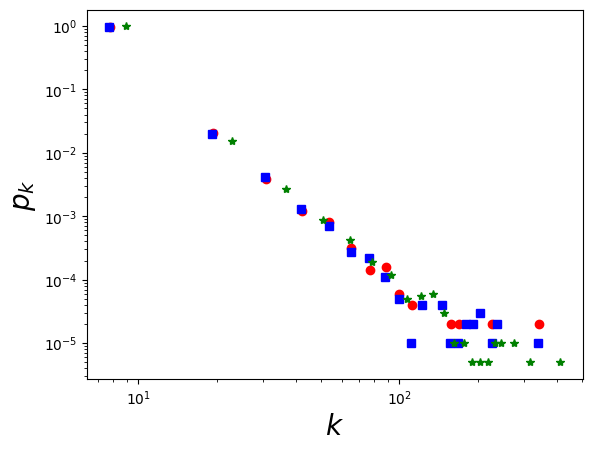

In [16]:
plt.plot(k1, pk1, 'ro')
plt.plot(k2, pk2, 'bs')
plt.plot(k3, pk3, 'g*')
plt.xlabel("$k$", fontsize=20)
plt.ylabel("$p_k$", fontsize=20)
plt.xscale("log")
plt.yscale("log")

#### 不同参数m下的度分布，N相同

In [17]:
k1, pk1 = get_degree_distribution(100000, 2)
k2, pk2 = get_degree_distribution(100000, 5)
k3, pk3 = get_degree_distribution(100000, 7)

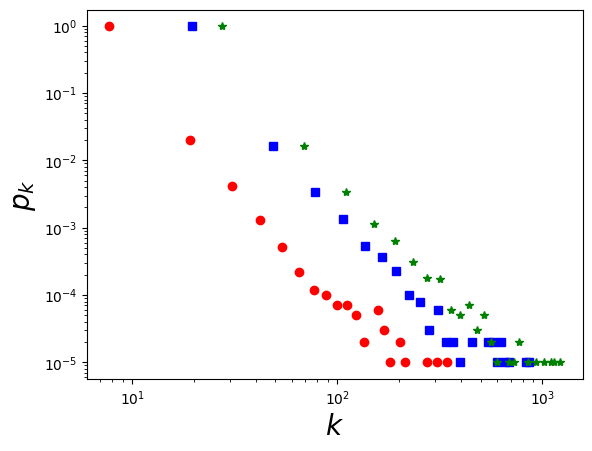

In [18]:
plt.plot(k1, pk1, 'ro')
plt.plot(k2, pk2, 'bs')
plt.plot(k3, pk3, 'g*')
plt.xlabel("$k$", fontsize=20)
plt.ylabel("$p_k$", fontsize=20)
plt.xscale("log")
plt.yscale("log")